In [1]:
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

results_path = os.path.join('.', 'results')

['train_loss', 'train_acc', 'test_loss', 'test_acc']
['train_loss', 'train_acc', 'test_loss', 'test_acc', 'weights_hist', 'unused_samples', 'p25_weight', 'p50_weight', 'p75_weight', 'mn_weight', 'std_weight']


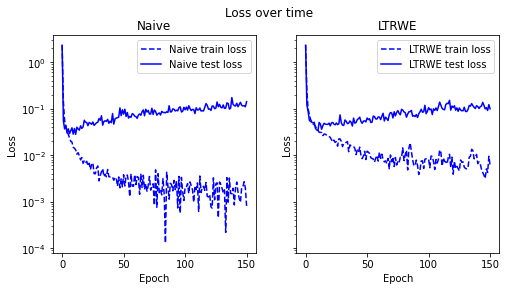

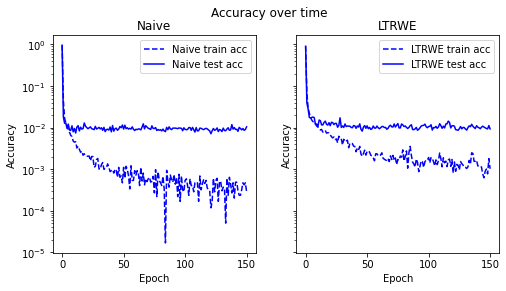

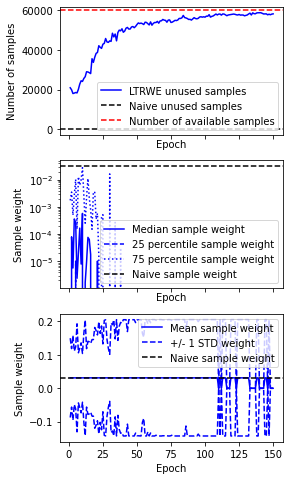

In [10]:
with open(os.path.join(results_path, 'clean_dataset_trial', 'results_MNIST_naive.pickle'), 'rb') as F:
    naive_results = pickle.load(F)
with open(os.path.join(results_path, 'clean_dataset_trial', 'results_MNIST_ltrwe.pickle'), 'rb') as F:
    ltrwe_results = pickle.load(F)
print([k for k in naive_results.keys()])
print([k for k in ltrwe_results.keys()])

(fig, ax) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
ax[0].plot(*naive_results['train_loss'], color='blue', linestyle='--', label='Naive train loss')
ax[0].plot(*naive_results['test_loss'], color='blue', linestyle='-', label='Naive test loss')
ax[1].plot(*ltrwe_results['train_loss'], color='blue', linestyle='--', label='LTRWE train loss')
ax[1].plot(*ltrwe_results['test_loss'], color='blue', linestyle='-', label='LTRWE test loss')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_title('Naive')
ax[1].set_title('LTRWE')
fig.suptitle('Loss over time')
ax[0].legend()
ax[1].legend()

(fig, ax) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
naive_train_error = 1-np.array(naive_results['train_acc'][1])
naive_test_error = 1-np.array(naive_results['test_acc'][1])
ltrwe_train_error = 1-np.array(ltrwe_results['train_acc'][1])
ltrwe_test_error = 1-np.array(ltrwe_results['test_acc'][1])
ax[0].plot(naive_results['train_acc'][0], naive_train_error, color='blue', linestyle='--', label='Naive train acc')
ax[0].plot(naive_results['test_acc'][0], naive_test_error, color='blue', linestyle='-', label='Naive test acc')
ax[1].plot(ltrwe_results['train_acc'][0], ltrwe_train_error, color='blue', linestyle='--', label='LTRWE train acc')
ax[1].plot(ltrwe_results['test_acc'][0], ltrwe_test_error, color='blue', linestyle='-', label='LTRWE test acc')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_title('Naive')
ax[1].set_title('LTRWE')
fig.suptitle('Accuracy over time')
ax[0].legend()
ax[1].legend()

(fig, ax) = plt.subplots(3, 1, sharex=True, figsize=(4, 8))
ax[0].plot(*ltrwe_results['unused_samples'], color='blue', linestyle='-', label='LTRWE unused samples')
ax[0].axhline(0, linestyle='--', color='black', label='Naive unused samples')
ax[0].axhline(60000, linestyle='--', color='red', label='Number of available samples')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Number of samples')
ax[0].legend()
ax[1].plot(*ltrwe_results['p50_weight'], linestyle='-', color='blue', label='Median sample weight')
ax[1].plot(*ltrwe_results['p25_weight'], linestyle='--', color='blue', label='25 percentile sample weight')
ax[1].plot(*ltrwe_results['p75_weight'], linestyle=':', color='blue', label='75 percentile sample weight')
ax[1].axhline(1/32, linestyle='--', color='black', label='Naive sample weight')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sample weight')
ax[1].legend()
ax[1].set_yscale('log')
ax[2].plot(*ltrwe_results['mn_weight'], linestyle='-', color='blue', label='Mean sample weight')
ax[2].plot(ltrwe_results['mn_weight'][0], [wm-ws for wm, ws in zip(ltrwe_results['mn_weight'][1], ltrwe_results['std_weight'][1])], linestyle='--', color='blue', label='+/- 1 STD weight')
ax[2].plot(ltrwe_results['mn_weight'][0], [wm+ws for wm, ws in zip(ltrwe_results['mn_weight'][1], ltrwe_results['std_weight'][1])], linestyle='--', color='blue')
ax[2].axhline(1/32, linestyle='--', color='black', label='Naive sample weight')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sample weight')
ax[2].legend()

[[36030 41421 42708 ... 58236 58422 58552]
 [ 4669  4090  3951 ...    49    43    48]
 [ 3031  2322  2072 ...    48    37    19]
 ...
 [    0     2     1 ...    30    19    20]
 [    0     0     0 ...    34    31    30]
 [    0     0     0 ...   827   806   782]]


/tmp/ipykernel_22150/2095603824.py:5: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(hist), aspect='equal')


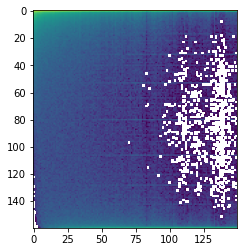

In [7]:
(fig, ax) = plt.subplots(1, 1)
histograms = [np.expand_dims(h[0], 1) for h in ltrwe_results['weights_hist'][1]]
hist = np.concatenate(histograms, axis=1)
print(hist)
ax.imshow(np.log(hist), aspect='equal')